<a href="https://colab.research.google.com/github/ECV21/Neural-Networks/blob/main/Basic_classification_classify_images_of_clothings_TensorFlow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to train a neural network model to classify images clothings, for example: sneakears and shirts. I'm goint to use tf.keras, a high leve API to build and train models in TensorFlow.

# Import libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf #Biblioteca de TensorFlow para construir y entrenar modelos de ML, redes neuronales

# Helper libraries
import numpy as np #biblioteca para operaciones matemáticas y manipular matrices
import matplotlib.pyplot as plt #liblioteca para crear gráficos y visualización

print(tf.__version__) #ver versión de TensorFlow

2.17.0


# Import the Fashion MNIST dataset

El dataset son datos utilizados para entrenar y probar modelos de ML, particularmente redes neuronales. Contiene 70,000 imágenes en escala de grises de tamñano 28x28 píxeles. 60,000 imágenes para entrenamiento y 10,000 para test.

Cada imagen pertence a una de 10 categorías de ropa:
0: T-shirt/top (camiseta)
1: Trouser (pantalón)
2: Pullover (suéter)
3: Dress (vestido)
4: Coat (abrigo)
5: Sandal (sandalia)
6: Shirt (camisa)
7: Sneaker (zapatilla deportiva)
8: Bag (bolsa)
9: Ankle boot (botín)

Las imágenes son de un tamaño de 28x28 píxeles, por lo que cada una es una matriz de 784 valores de píxel en escala de grises (donde cada valor varía de 0 a 255)



<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

# Importa dataset


In [2]:
#Importar dataset que viene incluido en TensorFlow; son imágenes de ropa
fashion_mnist = tf.keras.datasets.fashion_mnist


#cargar el dataset en dos partes, datos de entrenamiento (imagenes y labes) y test (imagenes y labes)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Definimos una lista que contiene las 10 etiquetas

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explorar dataset

In [4]:
train_images.shape #60,000 imágenes de 28x28

(60000, 28, 28)

In [5]:
len(train_labels) #60,000 etiquetas

60000

In [6]:
train_labels #etiquetas de 0 a 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape #hay 10k imágenes de 28x28 píxles

(10000, 28, 28)

# Procesamiento de dataset

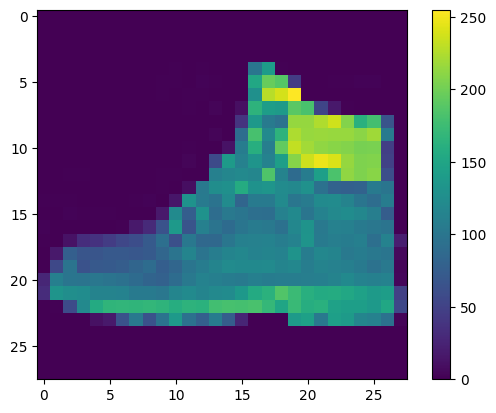

In [8]:
#Debemos procesar los datos antes de entrena el network; ver imágen 91 de dataset de entrenamiento.
# Con la imágen vemos que los píxles van de 0 a 255.

plt.figure()
plt.imshow(train_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Vamos a normalizar las imágenes en los conjuntos de train and test, vamos a divir el dataset entre 255 píxles
# Esto para escalar los datos de la ímagen en un rango de 0 a 1, para facilitar entrenamiento.


train_images = train_images / 255.0

test_images = test_images / 255.0

Cada imagen está compuesta por píxeles, cuyos valores originalmente están entre 0 y 255 (esto es típico para imágenes en escala de grises, donde 0 es negro y 255 es blanco).

Dividiendo todos los valores de los píxeles por 255, los valores de los píxeles se ajustan a un rango entre 0 y 1.

Este proceso de normalización ayuda a mejorar la eficiencia y estabilidad del modelo.

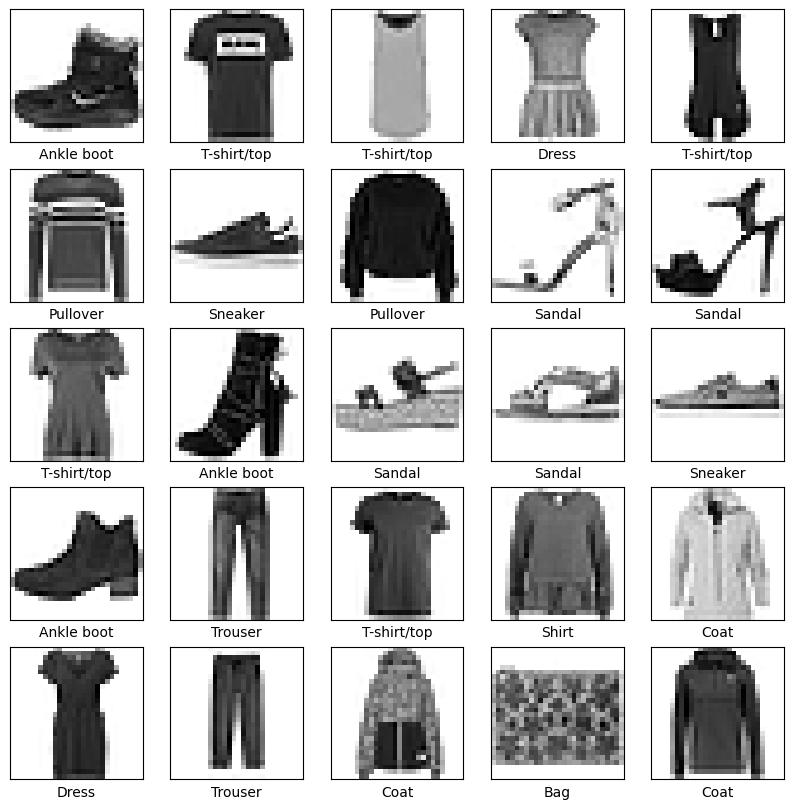

In [10]:
#Visualizar 25 imágenes de entrenamiento con su etiqueta



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construir el modelo

Construir las capas del modelo y luego aplciar el modelo.

In [11]:
#Crear modelo secuencial, es decir, las capas del modelos se apina una tras otra.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #capa toma imagenes de 28x28 y aplana en vector 1D--> 748
    tf.keras.layers.Dense(128, activation='relu'), #capa densa con 128 neuronas, cada una conecta con la enterio entrada
    #la función REULE se usa praa que las salidas sean no lineales
    tf.keras.layers.Dense(10) #otra capa densa pero con 10 neuronas, la salida representa la probabilidad de que
    #la imagen pertenezca a cada una de las 10 categorías

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Configurar el modelo antes de entrenarlo, definir como se optimiza, calcular la pérdida y la métrica de desempeño

model.compile(optimizer='adam', #usar optimizador "adam"
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #definir funcion de pérdida
              metrics=['accuracy']) #definir la métrica de desempeño

In [14]:
# entrenar el modelo con los datos de entrenamiento

model.fit(train_images, train_labels, epochs=10)

#entrenar con método "model.fit"; usando conjuto de entrenamiento, etiquetas de entrenamiento y 10 epochs.

#Este parámetro define cuántas veces el modelo verá todo el conjunto de entrenamiento
# durante el entrenamiento. En este caso, el modelo verá el conjunto completo
#de imágenes y etiquetas 10 veces para ajustar mejor los pesos y mejorar su rendimiento.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7825 - loss: 0.6301
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8592 - loss: 0.3892
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8758 - loss: 0.3476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8840 - loss: 0.3190
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8918 - loss: 0.2956
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8965 - loss: 0.2836
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9019 - loss: 0.2642
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9065 - loss: 0.2509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9099 - loss: 0.2435
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9087 - loss: 0.2436


In [15]:
#Evaluar el rendimiento del modelo anterior utilizando el conjunto de  datos test.

#Evaluar modelo con método "modelo.evaluate()", utilizando datos de test: test_imagen y test_label;
#con "verbose=2" indica que se imprimirá una salida simple de info
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8879 - loss: 0.3252

Test accuracy: 0.8878999948501587


#Pronóstico

In [16]:
#Crear un modelo que agrega una capa SOFTMAX a un modelo ya entrenado.

probability_model = tf.keras.Sequential([model, #Crear modelo secuencial, es decir, las capas se añaden una tras otra
                                         tf.keras.layers.Softmax()])

#"model" es el modelo ya entrenado; aquí ya fue ajustado para hcer predicciones con valore de salida sin procesar: logits
#" tf.keras.layers.Softmax()" añade una capa "softmax", esta capa convierte los logits en probabilidades
# con lo anterior, cada valor de salida será un número entre 0 y 1, que es la probabilidad de cada clase

In [17]:
#Hacer predicciones usando el modelo "probability_model" en el conjunto de datos "test_images".

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
#Ver probabilidad predicha para la PRIMERA IMAGEN en el conjunto de "test_image"

predictions[0] #devuelve un array de 10 valores (porque son 10 clases); cada valor
# representa la probabilidad que el modelo asigna a la primera imágen para cada clase.

array([9.2244846e-07, 1.0347078e-09, 3.7767779e-07, 7.7321510e-10,
       1.8332129e-07, 3.3222514e-04, 4.1828130e-07, 3.2763532e-03,
       7.4120713e-08, 9.9638945e-01], dtype=float32)

In [19]:
#muestra el índice de la clase con la mayor probabilidad predicha para la primer imágen de "test_image"

np.argmax(predictions[0]) #9.9638945e-01

9

In [20]:
#Mostrar la etiqueta verdadera de la primera imágen en el conjunto de datos test: test_image
test_labels[0]

9

In [21]:
#definir 2 funciones para visualizar y analizar las predicciones hechas por el modelo clasificador

def plot_image(i, predictions_array, true_label, img): #mustra imagen con prediccion  y etiqueta verdadera
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label): #visualiza un gráfico de barras con las probabilidades por 10 clases
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verificar predicción

Con el modelo entrenado podemos hacer predicciones de imágen.

Por ejempli, la imágen 0, las predicciones y el arreglo de predicción. Las etiquetas de predicción correctas están en azul y las etiquetas de predicción incorrectas están en rojo. El número indica el porcentaje (de 100) para la etiqueta predicha.

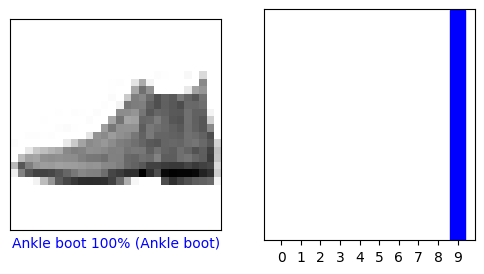

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

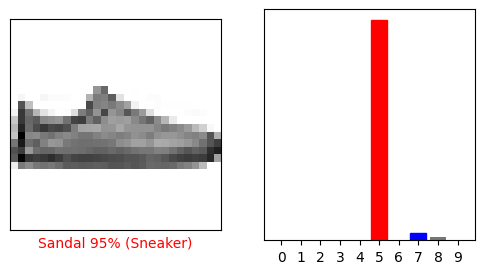

In [23]:
#ver imagen con index 12
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

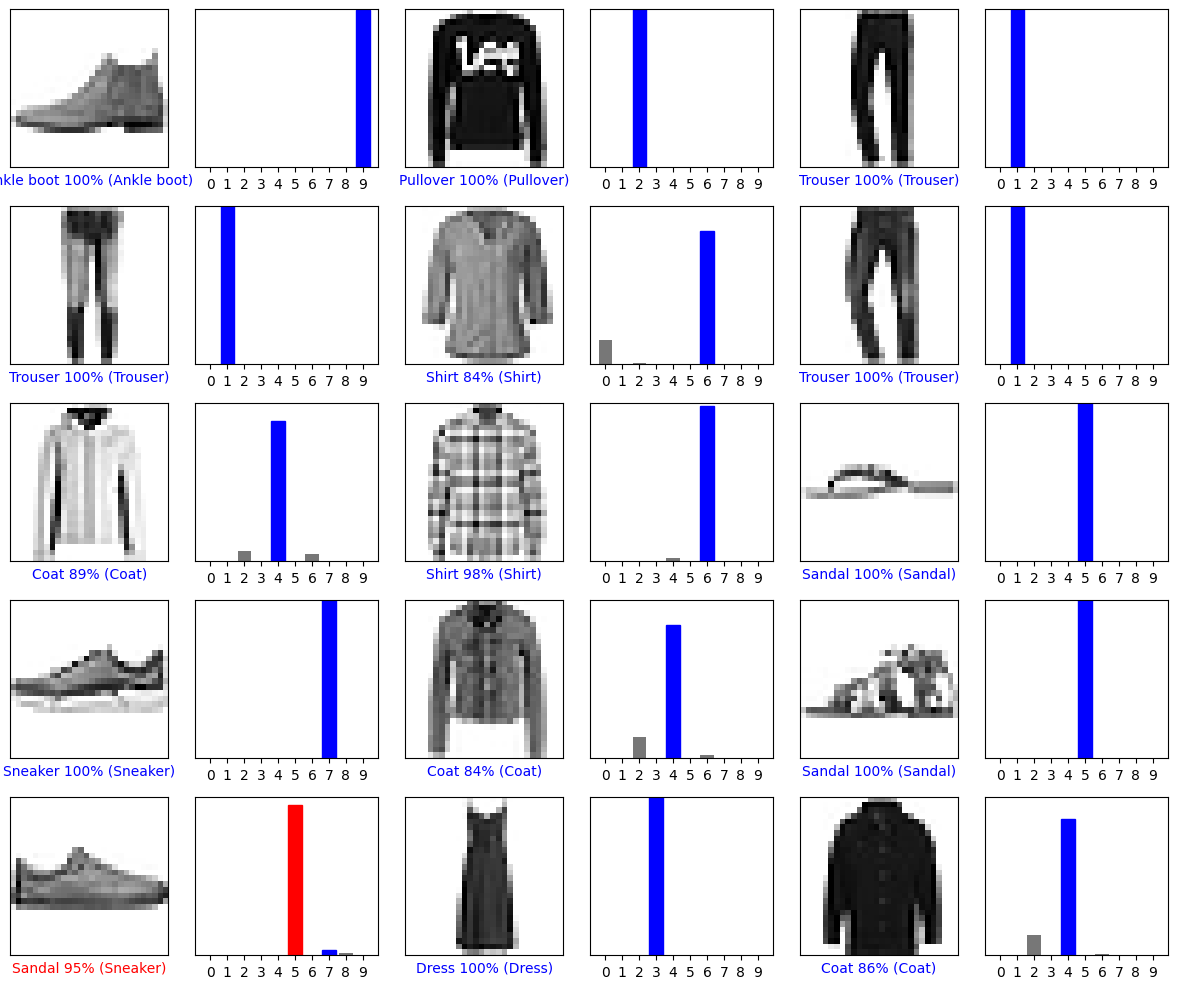

In [24]:
#ver varias imagenes

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# uso modelo entrenado

In [29]:
#obtener la sgunda imagen de conjunto test y ver su dimension

img = test_images[1]

print(img.shape)


(28, 28)


In [30]:
#transformar la imagen para que tenga la forma adecuada para la entrada
#en un modelo
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
#usar el modelo entrenado para predecir las probabilidades de que la imagen dadapertenexca a diferentes clases

predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.4746941e-05 8.3737957e-15 9.9905878e-01 4.2540155e-11 6.9446204e-04
  4.4826213e-12 2.3195804e-04 1.2132546e-15 1.3371870e-11 7.5854031e-13]]


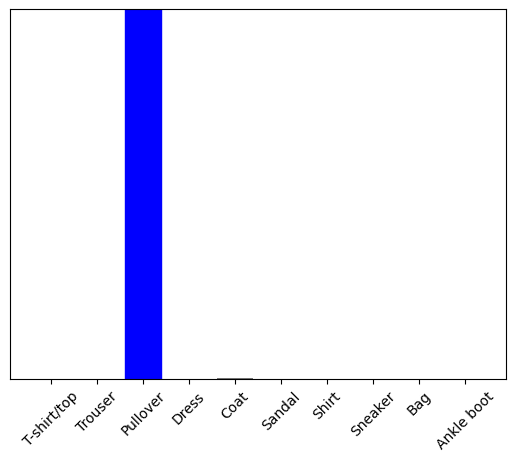

In [32]:
#Visualizar las probabilidades de las distintas clases para la prediccion de una imagen

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
# determinar cuál la clase más probable para la imagen segun la predicción dle modelo
np.argmax(predictions_single[0])

2